# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

In [27]:
import pandas as pd
# the machine didn't like trying to read the data until I used !curl

!curl https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

iris_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/iris/Index

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3.0,1.4,0.1,Iris-setosa
4.3,3.0,1.1,0.1,Iris-setosa
5.8,4.0,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5.0,3.0,1.6,0.2,Iris-setosa
5.0,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.0,3.2,1.2,0.2,Iris

In [23]:
flowers = pd.read_csv(iris_data_url)
flowers

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [30]:
print(flowers.shape)
print(flowers.head)

column_headers = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class']

flowers = pd.read_csv(iris_data_url, header=None, names=column_headers)

(150, 5)
<bound method NDFrame.head of      sepal length in cm  sepal width in cm  ...  petal width in cm           class
0                   5.1                3.5  ...                0.2     Iris-setosa
1                   4.9                3.0  ...                0.2     Iris-setosa
2                   4.7                3.2  ...                0.2     Iris-setosa
3                   4.6                3.1  ...                0.2     Iris-setosa
4                   5.0                3.6  ...                0.2     Iris-setosa
..                  ...                ...  ...                ...             ...
145                 6.7                3.0  ...                2.3  Iris-virginica
146                 6.3                2.5  ...                1.9  Iris-virginica
147                 6.5                3.0  ...                2.0  Iris-virginica
148                 6.2                3.4  ...                2.3  Iris-virginica
149                 5.9                3.0  ... 

In [31]:
flowers.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
?pd.read_csv
#but Austin suggests using stackoverflow
flowers.dtypes

sepal length in cm    float64
sepal width in cm     float64
petal length in cm    float64
petal width in cm     float64
class                  object
dtype: object

## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

In [34]:
from google.colab import files
uploaded = files.upload()

#method 1 google.colab uploader

Saving wine.data to wine.data


In [39]:
wine_headers = ['Alcohol','Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity',
                'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine = pd.read_csv('wine.data', header=None, names=wine_headers)
wine

# not sure why my indices are not sequential
#method 2 via the GUI method

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [0]:
# Your Code Here
''' 
df.shape,  df.head(),  df.dtyes,  

df.describe()
--Numeric or Non-Numeric

df['column'].value_counts(),  df.isnull().sum(),  df.fullna()

df.dropna(),  df.drop(),  pd.crosstab()
'''
#command cheat sheet

In [43]:
wine.shape

(178, 13)

In [42]:
# no parenthesis for this command because there are no additional parameters to set to it
wine.dtypes

Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [44]:
#parenthesis means this command has other options
wine.describe()


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [76]:
wine.describe(exclude=float)


,Magnesium,Proline
count,178.000000,178.000000
mean,99.741573,746.893258
std,14.282484,314.907474
min,70.000000,278.000000
25%,88.000000,500.500000
50%,98.000000,673.500000
75%,107.000000,985.000000
max,162.000000,1680.000000


In [78]:
wine['Proline']
# wine['Proline'].head
# wine['Proline'].tail
wine[['Proline','Ash']]

#command code to sample any specified amount of row
wine[['Proline','Ash']].sample(7)
#however, indices are not correct

,Proline,Ash
1,1065,2.43
1,920,2.41
2,278,2.00
2,607,2.92
1,1095,2.65
3,660,2.48
2,410,2.67


In [89]:

#flowers['class'].value_counts()

wine['Hue'].value_counts().sort_values(ascending=False)

#returns the value counts for each level of hue and sorts with the option to put them in ascending/descending order

#code has been chained together with "dots"
#the order of the code commands can alter the code

1.04    8
1.23    7
1.12    6
0.89    5
0.57    5
       ..
1.27    1
0.99    1
0.48    1
0.72    1
0.69    1
Name: Hue, Length: 78, dtype: int64

In [90]:
# this will return any data that is blank
wine['Total phenols'].isnull()

1    False
1    False
1    False
1    False
1    False
     ...  
3    False
3    False
3    False
3    False
3    False
Name: Total phenols, Length: 178, dtype: bool

In [92]:
wine['Total phenols'].isnull().sum()

#0 indicates that no data is missing 

#to check the whole dataframe
wine.isnull().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [93]:
wine.count()
#the opposite of missing data is valid data
#so, df.isnull and df.count compliment each other

Alcohol                         178
Malic acid                      178
Ash                             178
Alcalinity of ash               178
Magnesium                       178
Total phenols                   178
Flavanoids                      178
Nonflavanoid phenols            178
Proanthocyanins                 178
Color intensity                 178
Hue                             178
OD280/OD315 of diluted wines    178
Proline                         178
dtype: int64

In [96]:
wine['Magnesium'].value_counts()
#gives you the frequency

wine['Magnesium'].value_counts().sort_index()
#this returns the frequency for each data in the column sorted numerically

wine['Magnesium'].value_counts(normalize=True)
#returns the frequency in percentage format


88     0.073034
86     0.061798
101    0.050562
98     0.050562
96     0.044944
102    0.039326
112    0.033708
94     0.033708
85     0.033708
97     0.028090
80     0.028090
92     0.028090
103    0.028090
89     0.028090
90     0.022472
108    0.022472
107    0.022472
106    0.022472
120    0.016854
118    0.016854
116    0.016854
87     0.016854
100    0.016854
84     0.016854
111    0.016854
110    0.016854
78     0.016854
104    0.016854
95     0.016854
105    0.011236
93     0.011236
113    0.011236
91     0.011236
115    0.011236
82     0.005618
81     0.005618
162    0.005618
99     0.005618
151    0.005618
117    0.005618
119    0.005618
121    0.005618
122    0.005618
123    0.005618
124    0.005618
126    0.005618
127    0.005618
128    0.005618
132    0.005618
134    0.005618
136    0.005618
139    0.005618
70     0.005618
Name: Magnesium, dtype: float64

In [0]:
import numpy as np

## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

In [0]:
# Your Code Here

adult = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

In [0]:
c_h = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
                 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [111]:
#df = pd.read_csv(adult)

# for when the data uses data as headers use ", header=None" when you read in the data
# then add columns names via ", names=XXXX"
df = pd.read_csv(adult, header=None, names=c_h)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [112]:
df.shape

(32561, 15)

In [114]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [116]:
pd.crosstab(df['occupation'], df['hours-per-week'], margins=True)

hours-per-week,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,56,57,58,59,60,61,62,63,64,65,66,67,68,70,72,73,74,75,76,77,78,80,81,82,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99,All
occupation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
?,12,17,15,26,21,24,6,42,1,52,2,30,4,5,54,23,2,11,0,158,1,5,1,32,92,0,2,12,1,139,0,27,1,1,94,15,3,12,1,692,...,6,0,1,0,34,0,0,0,0,2,0,0,0,7,3,0,0,3,0,0,0,9,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,5,1843
Adm-clerical,1,2,1,2,9,5,1,18,2,33,0,26,1,7,59,26,4,6,1,186,1,6,2,31,79,4,10,9,1,122,0,30,5,6,207,25,32,135,11,2134,...,5,2,3,1,51,0,3,1,0,9,0,0,1,9,1,1,0,1,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3770
Armed-Forces,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
Craft-repair,1,1,1,4,2,1,0,9,0,13,0,3,1,0,14,7,1,2,0,50,0,2,0,6,28,2,1,5,0,77,0,14,3,0,136,16,12,33,1,2427,...,12,1,6,0,165,0,0,2,1,24,3,0,2,30,10,0,0,6,1,0,0,7,0,0,4,0,0,0,0,1,3,0,0,0,0,0,0,0,7,4099
Exec-managerial,2,0,4,4,4,3,3,4,1,18,0,12,2,1,13,9,1,1,1,45,0,1,1,7,38,1,0,5,1,59,1,19,3,0,96,12,9,55,3,1647,...,8,4,5,2,323,0,3,2,0,54,2,3,0,65,5,0,0,9,0,0,1,19,0,0,6,1,0,0,0,0,5,0,0,0,1,0,0,2,12,4066
Farming-fishing,0,1,0,0,0,1,1,4,0,11,1,5,0,3,5,3,0,1,0,36,1,0,0,9,19,0,1,2,0,37,0,1,0,0,38,9,1,3,0,317,...,8,0,0,0,98,0,2,0,0,28,2,0,0,36,11,0,1,8,0,3,1,14,0,1,10,5,2,0,1,0,4,1,0,1,0,1,1,7,12,994
Handlers-cleaners,0,1,0,0,1,2,2,5,1,12,0,12,1,1,19,16,4,7,2,57,0,4,2,12,39,2,3,10,0,67,0,8,1,1,47,9,7,9,3,770,...,5,0,2,0,24,0,1,1,0,3,2,0,0,5,2,0,0,0,0,0,0,5,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1370
Machine-op-inspct,2,0,0,1,0,0,1,2,0,9,1,1,0,1,6,2,1,0,0,28,3,0,0,8,15,0,0,3,0,47,0,13,0,3,34,10,6,21,4,1373,...,10,0,2,0,27,0,1,0,2,8,0,0,0,10,1,0,0,3,0,0,0,1,0,0,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2002
Other-service,1,1,4,7,6,11,6,21,5,44,2,42,5,10,95,48,8,14,7,263,8,9,9,65,164,7,7,19,3,257,2,71,6,12,241,27,28,58,3,1290,...,4,2,1,1,62,0,1,0,1,8,2,0,0,11,5,0,0,8,0,0,3,13,1,0,4,1,0,0,0,0,1,0,0,0,0,0,0,0,11,3295


## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


In [118]:
# Your Code Here
df['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

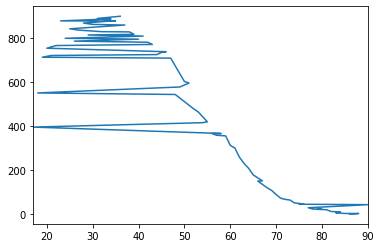

In [120]:
df['age'].value_counts().plot();
# the semi-colon is to remove the wierd title that appears

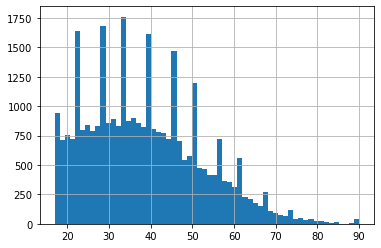

In [126]:
df['age'].hist(bins=60);

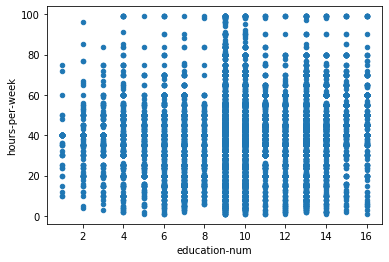

In [131]:
df.plot.scatter('education-num', 'hours-per-week');

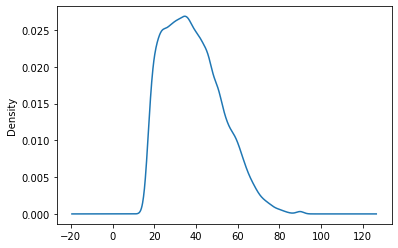

In [132]:
df['age'].plot.density();
#smoothed out histogram or k.d.e.

In [0]:
results = pd.crosstab(df['education-num'], df['hours-per-week'])

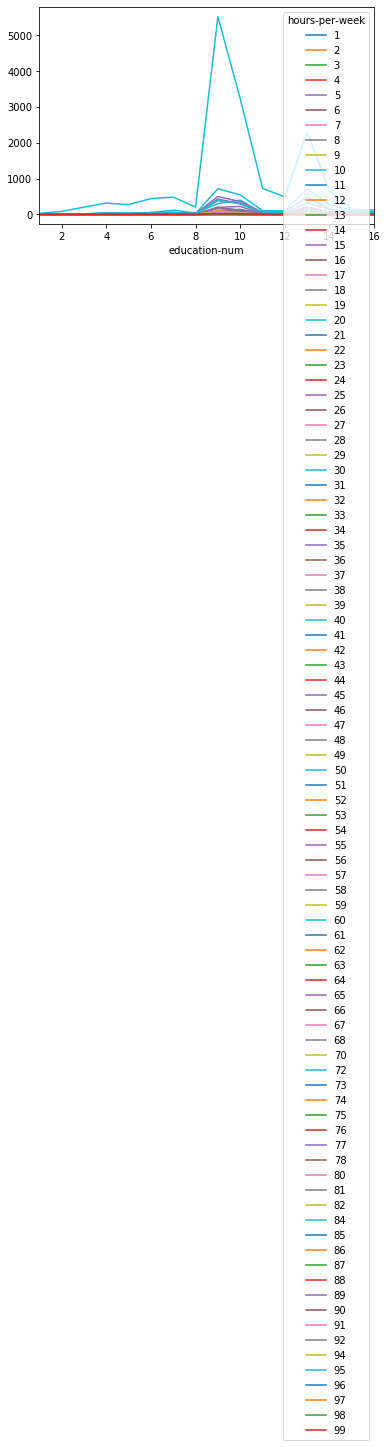

In [136]:
results.plot()

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.